In [25]:
% matplotlib inline
import airsim
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast
import re
import os

Connected!
Client Ver:1 (Min Req: 1), Server Ver:1 (Min Req: 1)

Retrieved images: %d 2


/home/ran/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # This is added back by InteractiveShellApp.init_path()


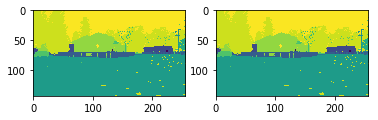

In [2]:
# do not run this code !!!!
# there is a bug, which will block the following cells when run the client connection.

client = airsim.VehicleClient()
client.confirmConnection()
responses = client.simGetImages([
    airsim.ImageRequest("0", airsim.ImageType.Segmentation, True), #depth in perspective projection
    airsim.ImageRequest("0", airsim.ImageType.Segmentation, False, False)])  #scene vision image in uncompressed RGBA array
print('Retrieved images: %d', len(responses))
r0 = responses[0]
r1 = responses[1]
img0 = np.array(r0.image_data_float)
img0 = img0.reshape(r0.height, r0.width)
img1 = np.fromstring(r1.image_data_uint8, dtype=np.uint8) #get numpy array
img1 = img0.reshape(r1.height, r1.width)
plt.subplot(121)
plt.imshow(img0)
plt.subplot(122)
plt.imshow(img1)

In [2]:
!ls

depth.png	    requirements.txt	  seg_rgb.txt
keras_segmentation  rgb.png		  setup.cfg
LICENSE.txt	    sample_images	  setup.py
mask_img.png	    scripts		  test
out.png		    segl.png		  test_img.png
README.md	    segment_airsim.ipynb  test_pretrained_nets.ipynb


In [3]:
seg_img = cv2.imread("segl.png")

In [4]:
seg_img[0,0,:]

array([234,  20, 250], dtype=uint8)

In [5]:
def list_encode(list):
    res = ''
    for ele in list:
        res += '#{}'.format(ele)
    return res

In [6]:
seg_rgb_dict = {}
with open("seg_rgb.txt") as f:
    for line in f:
        (key, val) = line.split('\t')
        val_list = ast.literal_eval(re.sub('\s+', '', val))
        seg_rgb_dict[list_encode(val_list)] = int(key)
#         seg_rgb_dict[int(key)] = ast.literal_eval(re.sub('\s+', '', val))

In [7]:
seg_rgb_dict['#156#198#23']

13

In [8]:
(height, width, channel) = np.shape(seg_img)

In [9]:
flat_seg_img = seg_img.reshape((-1,3))

In [10]:
np.shape(flat_seg_img)

(36864, 3)

In [11]:
def img2map_coding(img):
    '''
    Note that the encoded image is the 1d array, should reshape back
    into (height, width) form
    '''
    local_encoding = []
    local_img = img.reshape((-1,3))
    for ele in local_img:
        local_encoding.append(list_encode(list(ele)))
    return local_encoding

In [12]:
encoded_img = img2map_coding(seg_img)

In [13]:
encoded_img[0]

'#234#20#250'

In [14]:
mask_img = [seg_rgb_dict[e] for e in encoded_img]

In [15]:
# np.reshape((np.shape(seg_img)[0], np.shape(seg_img[1])), mask_img)
mask_img = np.array(mask_img)
len(mask_img)

36864

In [16]:
mask_img = mask_img.reshape((height, width))

In [17]:
mask_img.shape

(144, 256)

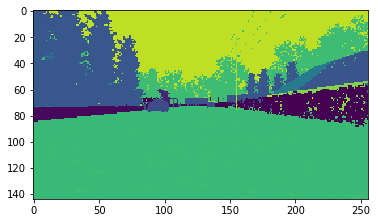

In [19]:
plt.imshow(mask_img)

In [20]:
cv2.imwrite('mask_img.png', mask_img)

True

In [21]:
!ls

depth.png	    requirements.txt	  seg_rgb.txt
keras_segmentation  rgb.png		  setup.cfg
LICENSE.txt	    sample_images	  setup.py
mask_img.png	    scripts		  test
out.png		    segl.png		  test_img.png
README.md	    segment_airsim.ipynb  test_pretrained_nets.ipynb


In [22]:
mask_dir = "./test/example_dataset/annotations_prepped_train"

In [23]:
test_saved_data = cv2.imread('mask_img.png')

In [24]:
test_saved_data.shape

(144, 256, 3)

In [26]:
test_msk_fname = "0001TP_006690.png"
example_msk_img = cv2.imread(os.path.join(mask_dir, test_msk_fname))
example_msk_img.shape

(360, 480, 3)